### ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞

In [ ]:
# Factor Analyzer ÏÑ§Ïπò
! pip install factor_analyzer

In [ ]:
# ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# Í≥µÍ∞ÑÏ†Å ÏûêÍ∏∞ÏÉÅÍ¥ÄÎ∂ÑÏÑù ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò
!pip install splot
!pip install pysal
!pip install esda

In [ ]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.filterwarnings(action='ignore')

## ÏΩîÎìú

In [ ]:
# ÎìúÎùºÏù¥Î∏å ÎßàÏö¥Ìä∏
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
data_all = pd.read_csv('/content/drive/MyDrive/ESAA OB 2·Ñå·Ö©/·Ñá·Ö°·Üº·Ñí·Ö°·Ü® ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•/·Ñé·Ö¨·Ñå·Ö©·Üº_·Ñé·Ö¨·Ñå·Ö©·Üº_·Ñá·Öß·Üº·Ñí·Ö°·Ü∏_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•.csv')

In [ ]:
data = data_all.drop(['Ïù¥Î¶Ñ'],axis = 1)

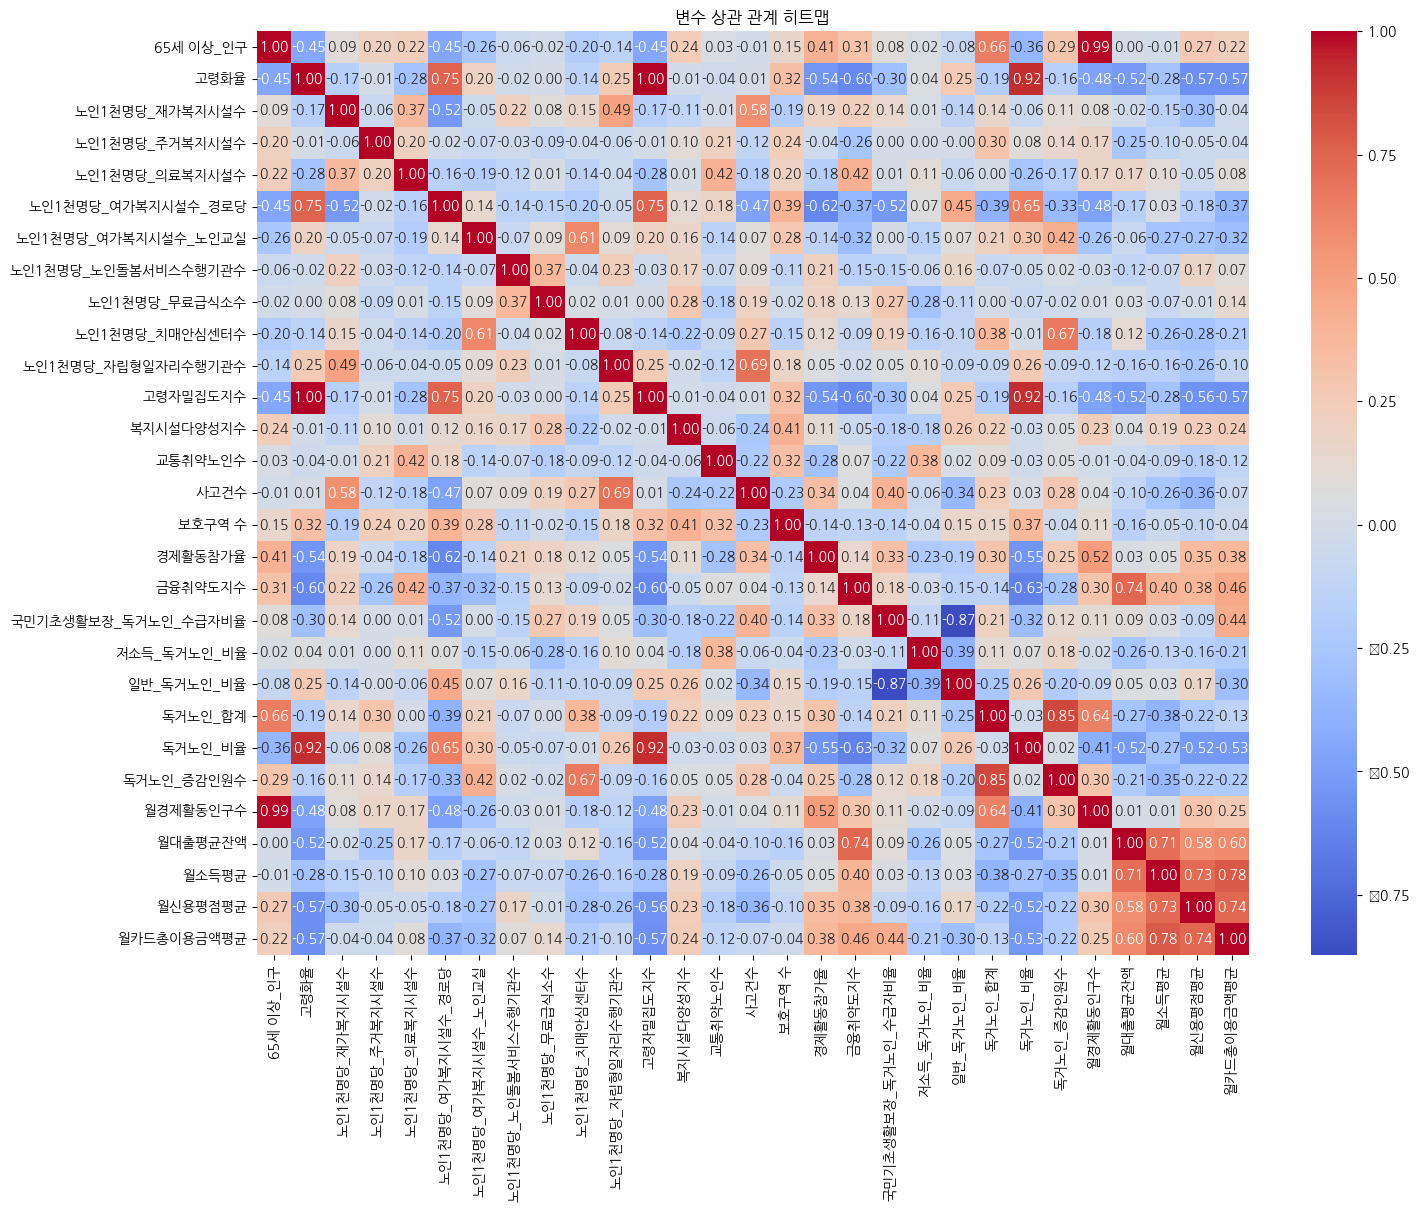

In [ ]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Î≥ÄÏàò ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ ÌûàÌä∏Îßµ')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import numpy as np
# XÏùò Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏùÑ floatÏúºÎ°ú Î≥ÄÌôò
data = data.astype(float)

# ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
data_const = add_constant(data)

# VIF Í≥ÑÏÇ∞
vif_data = pd.DataFrame()
vif_data['Variable'] = data_const.columns
vif_data['VIF'] = [variance_inflation_factor(data_const.values, i) for i in range(data_const.shape[1])]

# VIF Í≥ÑÏÇ∞ ÌõÑ Î¨¥ÌïúÍ∞íÏùÑ NaNÏúºÎ°ú ÎåÄÏ≤¥
vif_data['VIF'] = vif_data['VIF'].replace([np.inf, -np.inf], np.nan)

# VIF Í∞íÏù¥ 10 Ïù¥ÏÉÅÏù∏ Î≥ÄÏàòÎì§Îßå Ï∂úÎ†•
high_vif = vif_data[vif_data['VIF'] >= 10]
high_vif

Variable            VIF
1            65ÏÑ∏ Ïù¥ÏÉÅ_Ïù∏Íµ¨    2627.649347
2                 Í≥†Î†πÌôîÏú®  658465.952558
3       ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Ïû¨Í∞ÄÎ≥µÏßÄÏãúÏÑ§Ïàò      50.934493
5       ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§Ïàò      11.661037
6   ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Ïó¨Í∞ÄÎ≥µÏßÄÏãúÏÑ§Ïàò_Í≤ΩÎ°úÎãπ      32.075335
10      ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_ÏπòÎß§ÏïàÏã¨ÏÑºÌÑ∞Ïàò      33.361344
11  ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_ÏûêÎ¶ΩÌòïÏùºÏûêÎ¶¨ÏàòÌñâÍ∏∞Í¥ÄÏàò      30.228094
12            Í≥†Î†πÏûêÎ∞ÄÏßëÎèÑÏßÄÏàò  653850.088336
13           Î≥µÏßÄÏãúÏÑ§Îã§ÏñëÏÑ±ÏßÄÏàò      18.854091
14             ÍµêÌÜµÏ∑®ÏïΩÎÖ∏Ïù∏Ïàò      11.294066
15                ÏÇ¨Í≥†Í±¥Ïàò      32.408299
16              Î≥¥Ìò∏Íµ¨Ïó≠ Ïàò      26.408478
17             Í≤ΩÏ†úÌôúÎèôÏ∞∏Í∞ÄÏú®     116.685557
18             Í∏àÏúµÏ∑®ÏïΩÎèÑÏßÄÏàò      22.970916
22             ÎèÖÍ±∞ÎÖ∏Ïù∏_Ìï©Í≥Ñ     198.954207
23             ÎèÖÍ±∞ÎÖ∏Ïù∏_ÎπÑÏú®      91.040817
24          ÎèÖÍ±∞ÎÖ∏Ïù∏_Ï¶ùÍ∞êÏù∏ÏõêÏàò      80.462247
25            ÏõîÍ≤ΩÏ†úÌôúÎèôÏù∏Íµ¨Ïàò    2301.832595
26             ÏõîÎåÄÏ∂úÌèâÍ∑†ÏûîÏï°      28.319245
27               ÏõîÏÜåÎìùÌèâÍ∑†      33.113771
28             ÏõîÏã†Ïö©ÌèâÏ†êÌèâÍ∑†      72.104701
29          ÏõîÏπ¥ÎìúÏ¥ùÏù¥Ïö©Í∏àÏï°ÌèâÍ∑†      41.143438

* ÌûàÌä∏Îßµ Î∞è VIF Í∏∞Ï§ÄÏúºÎ°ú Î≥ÄÏàò drop

In [ ]:
data = data.drop(['Í≤ΩÏ†úÌôúÎèôÏ∞∏Í∞ÄÏú®', 'ÏÇ¨Í≥†Í±¥Ïàò', 'Î≥¥Ìò∏Íµ¨Ïó≠ Ïàò', 'ÏùºÎ∞ò_ÎèÖÍ±∞ÎÖ∏Ïù∏_ÎπÑÏú®', '65ÏÑ∏ Ïù¥ÏÉÅ_Ïù∏Íµ¨', 'ÎèÖÍ±∞ÎÖ∏Ïù∏_Ï¶ùÍ∞êÏù∏ÏõêÏàò', 'Ï†ÄÏÜåÎìù_ÎèÖÍ±∞ÎÖ∏Ïù∏_ÎπÑÏú®','Î≥µÏßÄÏãúÏÑ§Îã§ÏñëÏÑ±ÏßÄÏàò',
                  'ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_ÏùòÎ£åÎ≥µÏßÄÏãúÏÑ§Ïàò','ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Ïó¨Í∞ÄÎ≥µÏßÄÏãúÏÑ§Ïàò_Í≤ΩÎ°úÎãπ','ÏõîÍ≤ΩÏ†úÌôúÎèôÏù∏Íµ¨Ïàò','ÍµêÌÜµÏ∑®ÏïΩÎÖ∏Ïù∏Ïàò','ÎèÖÍ±∞ÎÖ∏Ïù∏_Ìï©Í≥Ñ','ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Ï£ºÍ±∞Î≥µÏßÄÏãúÏÑ§Ïàò','ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_ÎÖ∏Ïù∏ÎèåÎ¥ÑÏÑúÎπÑÏä§ÏàòÌñâÍ∏∞Í¥ÄÏàò'], axis=1)

In [ ]:
# ÏµúÏ¢Ö data Î≥ÄÏàòÎì§
data.columns

Index(['Í≥†Î†πÌôîÏú®', 'ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Ïû¨Í∞ÄÎ≥µÏßÄÏãúÏÑ§Ïàò', 'ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Ïó¨Í∞ÄÎ≥µÏßÄÏãúÏÑ§Ïàò_ÎÖ∏Ïù∏ÍµêÏã§', 'ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Î¨¥Î£åÍ∏âÏãùÏÜåÏàò',
       'ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_ÏπòÎß§ÏïàÏã¨ÏÑºÌÑ∞Ïàò', 'ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_ÏûêÎ¶ΩÌòïÏùºÏûêÎ¶¨ÏàòÌñâÍ∏∞Í¥ÄÏàò', 'Í≥†Î†πÏûêÎ∞ÄÏßëÎèÑÏßÄÏàò', 'Í∏àÏúµÏ∑®ÏïΩÎèÑÏßÄÏàò',
       'Íµ≠ÎØºÍ∏∞Ï¥àÏÉùÌôúÎ≥¥Ïû•_ÎèÖÍ±∞ÎÖ∏Ïù∏_ÏàòÍ∏âÏûêÎπÑÏú®', 'ÎèÖÍ±∞ÎÖ∏Ïù∏_ÎπÑÏú®', 'ÏõîÎåÄÏ∂úÌèâÍ∑†ÏûîÏï°', 'ÏõîÏÜåÎìùÌèâÍ∑†', 'ÏõîÏã†Ïö©ÌèâÏ†êÌèâÍ∑†',
       'ÏõîÏπ¥ÎìúÏ¥ùÏù¥Ïö©Í∏àÏï°ÌèâÍ∑†'],
      dtype='object')

In [ ]:
# Îç∞Ïù¥ÌÑ∞ shape
data.shape

(31, 14)

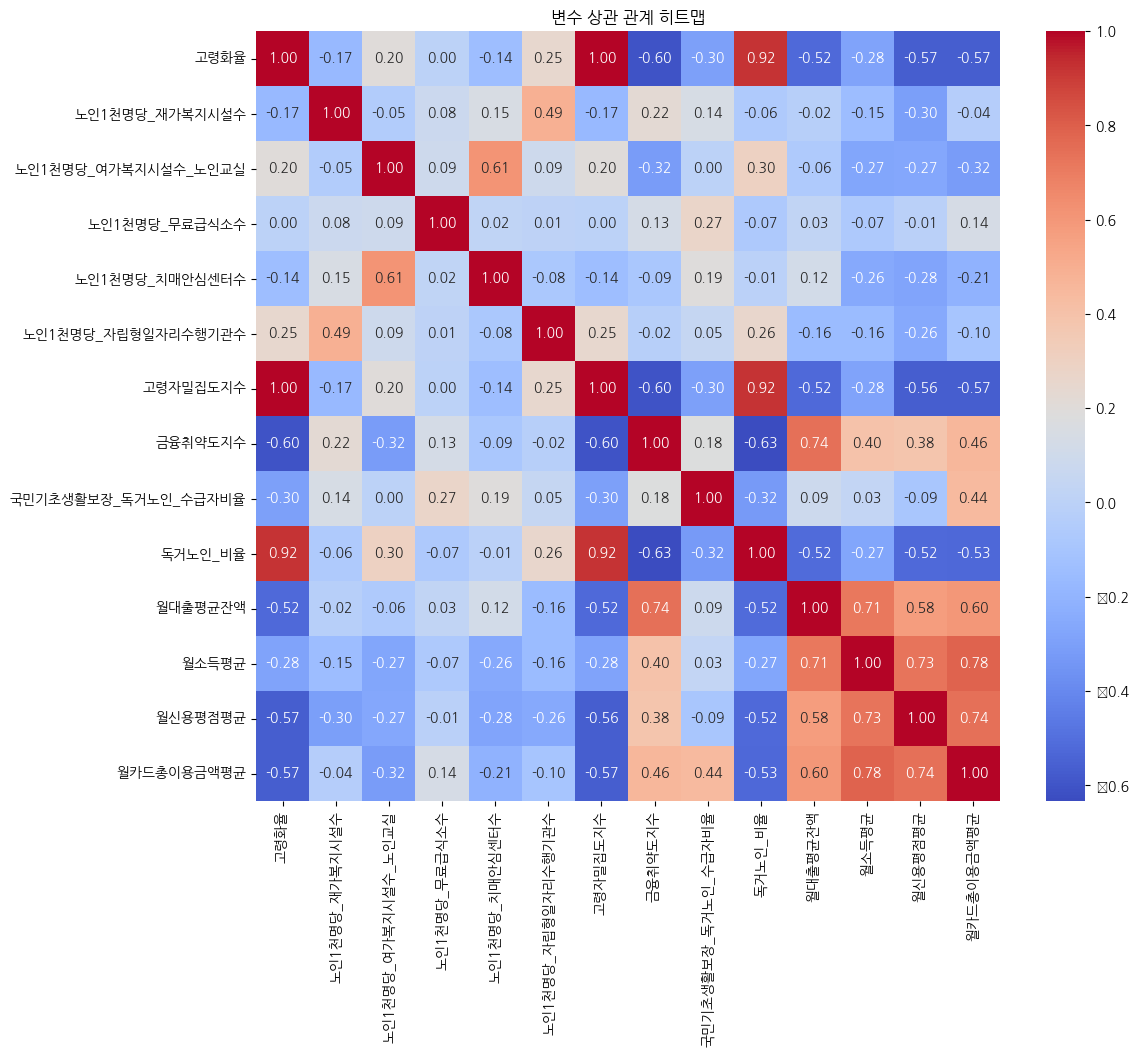

In [ ]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Î≥ÄÏàò ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ ÌûàÌä∏Îßµ')
plt.show()

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî, Ï†ÑÏ≤òÎ¶¨
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd

# ÏõêÎ≥∏ Î≥µÏÇ¨
processed = data.copy()

# === ‚ë† Î°úÍ∑∏ Î≥ÄÌôò ÎåÄÏÉÅ (Í∏àÏúµ Í∏àÏï°Î•ò: Í∏àÏï° Î≤îÏúÑ ÌÅº) ===
log_vars = ['ÏõîÎåÄÏ∂úÌèâÍ∑†ÏûîÏï°', 'ÏõîÏÜåÎìùÌèâÍ∑†', 'ÏõîÏπ¥ÎìúÏ¥ùÏù¥Ïö©Í∏àÏï°ÌèâÍ∑†']
for col in log_vars:
    processed[col] = processed[col].apply(lambda x: np.log1p(x))  # log(1 + x)

# === ‚ë° Ïä§ÏºÄÏùºÎßÅ ===

# (1) StandardScaler ÎåÄÏÉÅ: ÎπÑÏú®/ÏßÄÏàòÎ•ò
standard_scale_vars = [
    'Í≥†Î†πÌôîÏú®', 'Í≥†Î†πÏûêÎ∞ÄÏßëÎèÑÏßÄÏàò', 'Í∏àÏúµÏ∑®ÏïΩÎèÑÏßÄÏàò',
    'Íµ≠ÎØºÍ∏∞Ï¥àÏÉùÌôúÎ≥¥Ïû•_ÎèÖÍ±∞ÎÖ∏Ïù∏_ÏàòÍ∏âÏûêÎπÑÏú®', 'ÎèÖÍ±∞ÎÖ∏Ïù∏_ÎπÑÏú®',
    'ÏõîÏã†Ïö©ÌèâÏ†êÌèâÍ∑†'  # log Ï≤òÎ¶¨ Ìè¨Ìï®
]
scaler_std = StandardScaler()
processed[standard_scale_vars] = scaler_std.fit_transform(processed[standard_scale_vars])

# (2) MinMaxScaler ÎåÄÏÉÅ: ÏãúÏÑ§ Ïàò / ÎìúÎ¨ºÍ≤å Îì±Ïû•ÌïòÎäî Ï†ïÏàòÌòï Î≥ÄÏàò
minmax_scale_vars = [
    'ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Ïû¨Í∞ÄÎ≥µÏßÄÏãúÏÑ§Ïàò',
    'ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Ïó¨Í∞ÄÎ≥µÏßÄÏãúÏÑ§Ïàò_ÎÖ∏Ïù∏ÍµêÏã§',
    'ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Î¨¥Î£åÍ∏âÏãùÏÜåÏàò',
    'ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_ÏπòÎß§ÏïàÏã¨ÏÑºÌÑ∞Ïàò',
    'ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_ÏûêÎ¶ΩÌòïÏùºÏûêÎ¶¨ÏàòÌñâÍ∏∞Í¥ÄÏàò'
]
scaler_mm = MinMaxScaler()
processed[minmax_scale_vars] = scaler_mm.fit_transform(processed[minmax_scale_vars])

# (3) log + StandardScaler ÎåÄÏÉÅ: Í∏àÏúµ Í∏àÏï°Î•ò
log_std_vars = ['ÏõîÎåÄÏ∂úÌèâÍ∑†ÏûîÏï°', 'ÏõîÏÜåÎìùÌèâÍ∑†', 'ÏõîÏπ¥ÎìúÏ¥ùÏù¥Ïö©Í∏àÏï°ÌèâÍ∑†']
scaler_log_std = StandardScaler()
processed[log_std_vars] = scaler_log_std.fit_transform(processed[log_std_vars])

# === ‚ë¢ Î∞òÏ†Ñ Ï≤òÎ¶¨ (Í≥†ÏúÑÌóòÎèÑÏóê ÏùåÏùò ÏòÅÌñ•Ïù∏ Î≥ÄÏàò) ===
reverse_vars = [
    'ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Ïû¨Í∞ÄÎ≥µÏßÄÏãúÏÑ§Ïàò',
    'ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Ïó¨Í∞ÄÎ≥µÏßÄÏãúÏÑ§Ïàò_ÎÖ∏Ïù∏ÍµêÏã§',
    'ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Î¨¥Î£åÍ∏âÏãùÏÜåÏàò',
    'ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_ÏπòÎß§ÏïàÏã¨ÏÑºÌÑ∞Ïàò',
    'ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_ÏûêÎ¶ΩÌòïÏùºÏûêÎ¶¨ÏàòÌñâÍ∏∞Í¥ÄÏàò',
    'ÏõîÏÜåÎìùÌèâÍ∑†',
    'ÏõîÏã†Ïö©ÌèâÏ†êÌèâÍ∑†',
    'ÏõîÏπ¥ÎìúÏ¥ùÏù¥Ïö©Í∏àÏï°ÌèâÍ∑†'
]

# 1.0 - Í∞íÏúºÎ°ú Îí§ÏßëÍ∏∞ (Ïä§ÏºÄÏùºÎßÅÎêú Í∞í Í∏∞Ï§Ä)
for col in reverse_vars:
    processed[col] = -processed[col]  # ÎòêÎäî 1.0 - processed[col] ÎèÑ Í∞ÄÎä•

# Í≤∞Í≥º ÌôïÏù∏
processed.head()

Í≥†Î†πÌôîÏú®  ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Ïû¨Í∞ÄÎ≥µÏßÄÏãúÏÑ§Ïàò  ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Ïó¨Í∞ÄÎ≥µÏßÄÏãúÏÑ§Ïàò_ÎÖ∏Ïù∏ÍµêÏã§  ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Î¨¥Î£åÍ∏âÏãùÏÜåÏàò  \
0 -0.040131       -0.329407             -0.00000           -0.0   
1 -0.229103       -0.432841             -0.00000           -0.0   
2  1.605502       -0.256889             -0.70964           -0.0   
3  1.361413       -0.269570             -0.00000           -0.0   
4  1.810222       -0.345327             -0.00000           -0.0   

   ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_ÏπòÎß§ÏïàÏã¨ÏÑºÌÑ∞Ïàò  ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_ÏûêÎ¶ΩÌòïÏùºÏûêÎ¶¨ÏàòÌñâÍ∏∞Í¥ÄÏàò  Í≥†Î†πÏûêÎ∞ÄÏßëÎèÑÏßÄÏàò   Í∏àÏúµÏ∑®ÏïΩÎèÑÏßÄÏàò  \
0            -0.0           -0.000000 -0.040957 -1.417183   
1            -0.0           -0.000000 -0.232919  1.403501   
2            -0.0           -0.470964  1.606989 -0.880066   
3            -0.0           -0.000000  1.365113 -0.660357   
4            -0.0           -0.000000  1.807702 -0.838773   

   Íµ≠ÎØºÍ∏∞Ï¥àÏÉùÌôúÎ≥¥Ïû•_ÎèÖÍ±∞ÎÖ∏Ïù∏_ÏàòÍ∏âÏûêÎπÑÏú®   ÎèÖÍ±∞ÎÖ∏Ïù∏_ÎπÑÏú®   ÏõîÎåÄÏ∂úÌèâÍ∑†ÏûîÏï°     ÏõîÏÜåÎìùÌèâÍ∑†   ÏõîÏã†Ïö©ÌèâÏ†êÌèâÍ∑†  ÏõîÏπ¥ÎìúÏ¥ùÏù¥Ïö©Í∏àÏï°ÌèâÍ∑†  
0             0.009304  0.460518 -1.564256  0.530867  0.294695    0.149838  
1            -1.090746 -0.323984  1.717757 -0.846513  0.411817    0.357939  
2            -0.900049  1.735299 -0.661449  0.254444  0.376681    0.704844  
3            -0.730917  1.328512 -0.489390 -0.397989 -0.080097    0.236485  
4            -1.229703  1.785651  0.335870 -0.471891  0.575789    0.821630

In [ ]:
# Bartlett Í≤ÄÏ†ï
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(processed)
chi_square_value, p_value

(np.float64(601.9915592641623), np.float64(2.4792585869915832e-76))

p-valueÍ∞Ä Í±∞Ïùò 0Ïóê Í∞ÄÍπåÏõÄ. Í≤ÄÏ†ïÏù¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïòÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏ÌïòÎ©∞, Ïù¥Îäî Î≥ÄÏàòÎì§ Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ï°¥Ïû¨ ‚Üí ÏöîÏù∏Î∂ÑÏÑùÏùÑ ÏßÑÌñâÌï† Ïàò ÏûàÏùåÏùÑ ÏùòÎØ∏.

In [ ]:
# KMO(Kaiser-Meyer-Olkin) Í≤ÄÏÇ¨
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(processed)
kmo_model

np.float64(0.6077521794710167)

Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤¥ KMO Í∞íÏùÄ 0.6077ÏúºÎ°ú Ïù¥Îäî ÏöîÏù∏Î∂ÑÏÑùÏùÑ ÏßÑÌñâÌï† Ïàò ÏûàÏùåÏùÑ ÏùòÎØ∏.

### Ïù∏ÏûêÏàò Í≤∞Ï†ïÌïòÍ∏∞(Identify the Number of Factors)
* ÏöîÏù∏ ÏàòÎ•º ÏÑ†ÌÉùÌï† ÎïåÎäî Kaiser Í∏∞Ï§Ä(Kaiser criterion)Í≥º Ïä§ÌÅ¨Î¶¨ ÌîåÎ°Ø(Scree plot)ÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏùå. Ïù¥ Îëê Î∞©Î≤ï Î™®Îëê Í≥†Ïú†Í∞í(eigenvalues)ÏùÑ Í∏∞Î∞òÏúºÎ°ú Ìï®.

In [ ]:
from factor_analyzer import FactorAnalyzer

# Factor Analyzer Í∞ùÏ≤¥ ÏÉùÏÑ±
fa = FactorAnalyzer()

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÎåÄÌï¥ ÏöîÏù∏Î∂ÑÏÑù Ï†ÅÌï©
fa.fit(data)

# Í≥†Ïú†Í∞í(eigenvalues) ÌôïÏù∏
ev, v = fa.get_eigenvalues() # eigenvalues

# Í≥†Ïú†Í∞í Ï∂úÎ†•
ev

array([5.41086123e+00, 2.14326057e+00, 1.58847467e+00, 1.26795317e+00,
       1.17104220e+00, 8.25218783e-01, 6.23936945e-01, 4.56479263e-01,
       2.35947113e-01, 1.28096357e-01, 5.94583704e-02, 5.42851991e-02,
       3.49845406e-02, 1.58001567e-06])

* Kaiser Í∏∞Ï§Ä:
</br>Ïù¥ Í∑úÏπôÏùÄ Í≥†Ïú†Í∞íÏù¥ 1Î≥¥Îã§ ÌÅ∞ ÏöîÏù∏Îì§ÏùÑ Ïú†ÏßÄÌï† Í≤ÉÏùÑ Ï†úÏïàÌï®.

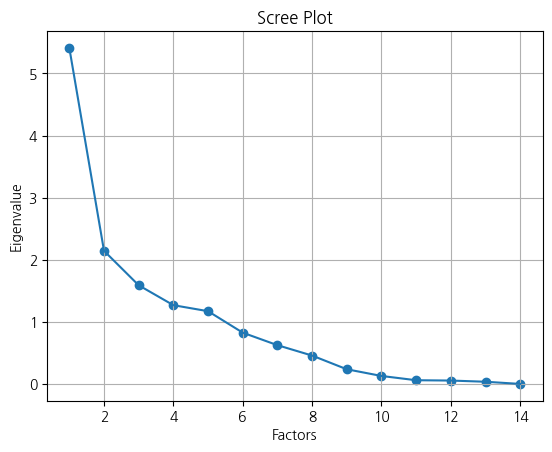

In [ ]:
# Scree plot ÏÉùÏÑ±
import matplotlib.pyplot as plt
plt.scatter(range(1, data.shape[1]+1), ev)
plt.plot(range(1, data.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
import numpy as np
np.sum(ev>1)

np.int64(5)

Scree plot Î∞©Î≤ïÏùÄ Í∞Å ÏöîÏù∏Í≥º Í∑∏ Í≥†Ïú†Í∞í(eigenvalues)ÏùÑ Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑÎ°ú ÎÇòÌÉÄÎÉÑ. 1Î≥¥Îã§ ÌÅ∞ Í≥†Ïú†Í∞íÏùò Í∞úÏàòÎ•º ÏöîÏù∏ ÏàòÎ°ú Í∞ÑÏ£ºÌï®.

### Factor Analysis ÏàòÌñâ
Ïó¨Í∏∞ÏÑúÎäî ÏöîÏù∏ Ï†ÅÏû¨ ÌñâÎ†¨(factor loading matrix)Ïóê ÎåÄÌï¥ ÌöåÏ†Ñ(rotation)ÏùÑ ÏàòÌñâ. ÌöåÏ†ÑÏùò Î™©Ï†ÅÏùÄ Í∞Å Î≥ÄÏàòÎì§Ïù¥ ÌäπÏ†ï ÏöîÏù∏(factor)Ïóê Îçî ÎöúÎ†∑ÌïòÍ≤å Ïó∞Í≤∞ÎêòÎèÑÎ°ù(Í∑πÎã®Ï†ÅÏù∏ Ï†ÅÏû¨Í∞íÏùÑ Í∞ñÎèÑÎ°ù) ÎßåÎì§Ïñ¥, Í∞Å ÏöîÏù∏Ïùò Ìï¥ÏÑùÎ†•ÏùÑ ÎÜíÏù¥Í≥† Î™ÖÌôïÌïú ÏùòÎØ∏Î•º Î∂ÄÏó¨ÌïòÎäî Îç∞ ÏûàÏùå.
</br>From a mathematical point of view, there is no difference between a rotated and unrotated matrix. The fitted model is the same, the uniquenesses are the same, and the proportion of variance explained is the same.

In [ ]:
fa = FactorAnalyzer(n_factors = 5, rotation ='varimax',method = 'ml').fit(processed)

**Í≥µÌÜµÏÑ±(Communality)**
</br>Í≥µÌÜµÏÑ±(Communality)Ïù¥ÎûÄ, Í∞Å Î≥ÄÏàòÏùò Ï†ÑÏ≤¥ Î∂ÑÏÇ∞ Ï§ëÏóêÏÑú ÏöîÏù∏ Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ ÏÑ§Î™ÖÎêòÎäî ÎπÑÏú®ÏùÑ ÏùòÎØ∏.
Ï¶â, Í∞Å Î≥ÄÏàòÏùò Î∂ÑÏÇ∞ÏùÑ ÏöîÏù∏(factor)Îì§Ïù¥ ÏñºÎßàÎÇò Ïûò ÏÑ§Î™ÖÌïòÎäîÏßÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÏßÄÌëú.
  * Í≥µÌÜµÏÑ± Ìï¥ÏÑù Î∞©Î≤ï (How to Interpret Communalities)
    * Î≤îÏúÑ: Í≥µÌÜµÏÑ± Í∞íÏùÄ 0ÏóêÏÑú 1 ÏÇ¨Ïù¥.
    - 0: Ìï¥Îãπ Î≥ÄÏàòÏùò Î∂ÑÏÇ∞ÏùÑ ÏöîÏù∏Îì§Ïù¥ Ï†ÑÌòÄ ÏÑ§Î™ÖÌïòÏßÄ Î™ªÌï®
    - 1: Ìï¥Îãπ Î≥ÄÏàòÏùò Î∂ÑÏÇ∞Ïù¥ Ï†ÑÏ†ÅÏúºÎ°ú ÏöîÏù∏Îì§Ïóê ÏùòÌï¥ ÏÑ§Î™ÖÎê®

In [ ]:
print("\nCommunalities (PAF):")

# Get communalities
communalities_df = pd.DataFrame(fa.get_communalities(), columns=['Communality'], index=data.columns)

# ÎÜíÏùÄ Í≥µÌÜµÏÑ±ÏùÑ Í∞ñÎäî Î≥ÄÏàòÏóê highlightÌïòÎäî Ìï®Ïàò
def highlight_high_communalities(val):
    if val > 0.6:
        return 'background-color: lightgreen'
    else:
        return ''

# Ìï®Ïàò Ï†ÅÏö©
styled_communalities = communalities_df.style.applymap(highlight_high_communalities)

styled_communalities


Communalities (PAF):


**ÏöîÏù∏ Ï†ÅÏû¨Îüâ**
</br>ÏöîÏù∏ Ï†ÅÏû¨ÎüâÏùÄ ÌïòÎÇòÏùò Î≥ÄÏàòÏôÄ ÌäπÏ†ï ÏöîÏù∏(factor) ÏÇ¨Ïù¥Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÎòêÎäî Í¥ÄÎ†®ÏÑ±Ïùò Ï†ïÎèÑÎ•º ÏùòÎØ∏. Ï¶â, Ïñ¥Îñ§ Î≥ÄÏàòÍ∞Ä ÌäπÏ†ï ÏöîÏù∏Í≥º ÏñºÎßàÎÇò Î∞ÄÏ†ëÌïòÍ≤å Ïó∞Í≤∞ÎêòÏñ¥ ÏûàÎäîÏßÄÎ•º Î≥¥Ïó¨Ï£ºÎäî Í∞í.



In [ ]:
# ÏöîÏù∏ Ï†ÅÏû¨Îüâ Ï∂úÎ†•
print("Factor loadings (PAF)")

# ÏöîÏù∏Ï†ÅÏû¨ ÌñâÎ†¨ ÏÉùÏÑ±
lmatrix = pd.DataFrame(
    fa.loadings_,
    index=list(processed.columns),
    columns=['Ïù∏Ïûê 1', 'Ïù∏Ïûê 2', 'Ïù∏Ïûê 3','Ïù∏Ïûê 4', 'Ïù∏Ïûê 5']
)

# Í∞Å Î≥ÄÏàòÎ≥Ñ ÏµúÎåÄ Ï†àÎåÄ Ï†ÅÏû¨Í∞í ÏúÑÏπò Ï∞æÍ∏∞
max_loading_mask = lmatrix.abs().eq(lmatrix.abs().max(axis=1), axis=0)

# Ïä§ÌÉÄÏùºÎßÅ Ìï®Ïàò: ÏµúÎåÄ loading ÏÖÄÏóêÎßå ÏÉâÏπ†
def highlight_max(df):
    # CSS Ïä§ÌÉÄÏùº DataFrame ÏÉùÏÑ±
    style_df = pd.DataFrame('', index=df.index, columns=df.columns)
    style_df[max_loading_mask] = 'background-color: lightblue'
    return style_df

# Ïä§ÌÉÄÏùº Ï†ÅÏö©
styled_lmatrix = lmatrix.style.apply(highlight_max, axis=None)

styled_lmatrix

Factor loadings (PAF)


In [ ]:
# Í∞Å Î≥ÄÏàòÎ≥Ñ ÏµúÎåÄ loading Ï†àÎåÄÍ∞íÏù¥ ÏûàÎäî Factor Íµ¨ÌïòÍ∏∞
assigned_factors = lmatrix.abs().idxmax(axis=1) # ÏöîÏù∏ Ï†ÅÏû¨ ÌñâÎ†¨

# Î≥ÄÏàò, Ìï†ÎãπÎêú Factor, loading Í∞íÏúºÎ°ú DataFrame ÎßåÎì§Í∏∞
assigned_df = pd.DataFrame({
    'Variable': lmatrix.index,
    'Assigned Factor': assigned_factors,
    'Loading': [lmatrix.loc[var, factor] for var, factor in zip(lmatrix.index, assigned_factors)]
})

# Assigned FactorÎ≥Ñ Ï†ïÎ†¨
assigned_df = assigned_df.sort_values('Assigned Factor').reset_index(drop=True)

# Î≥¥Í∏∞ Ï¢ãÍ≤å Ï∂úÎ†•
assigned_df[['Assigned Factor','Variable','Loading']]

Assigned Factor             Variable   Loading
0             Ïù∏Ïûê 1                 Í≥†Î†πÌôîÏú®  0.964623
1             Ïù∏Ïûê 1             Í≥†Î†πÏûêÎ∞ÄÏßëÎèÑÏßÄÏàò  0.964683
2             Ïù∏Ïûê 1              ÎèÖÍ±∞ÎÖ∏Ïù∏_ÎπÑÏú®  0.882705
3             Ïù∏Ïûê 2                ÏõîÏÜåÎìùÌèâÍ∑†  0.857301
4             Ïù∏Ïûê 2              ÏõîÏã†Ïö©ÌèâÏ†êÌèâÍ∑†  0.766456
5             Ïù∏Ïûê 2           ÏõîÏπ¥ÎìúÏ¥ùÏù¥Ïö©Í∏àÏï°ÌèâÍ∑†  0.801661
6             Ïù∏Ïûê 3  ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Ïó¨Í∞ÄÎ≥µÏßÄÏãúÏÑ§Ïàò_ÎÖ∏Ïù∏ÍµêÏã§  0.693068
7             Ïù∏Ïûê 3       ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_ÏπòÎß§ÏïàÏã¨ÏÑºÌÑ∞Ïàò  0.921554
8             Ïù∏Ïûê 4              Í∏àÏúµÏ∑®ÏïΩÎèÑÏßÄÏàò  0.753130
9             Ïù∏Ïûê 4              ÏõîÎåÄÏ∂úÌèâÍ∑†ÏûîÏï°  0.780338
10            Ïù∏Ïûê 5       ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Ïû¨Í∞ÄÎ≥µÏßÄÏãúÏÑ§Ïàò  0.417055
11            Ïù∏Ïûê 5        ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Î¨¥Î£åÍ∏âÏãùÏÜåÏàò  0.292051
12            Ïù∏Ïûê 5   ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_ÏûêÎ¶ΩÌòïÏùºÏûêÎ¶¨ÏàòÌñâÍ∏∞Í¥ÄÏàò  0.324067
13            Ïù∏Ïûê 5  Íµ≠ÎØºÍ∏∞Ï¥àÏÉùÌôúÎ≥¥Ïû•_ÎèÖÍ±∞ÎÖ∏Ïù∏_ÏàòÍ∏âÏûêÎπÑÏú® -0.759475

In [ ]:
# Get variance of each factors
fa.get_factor_variance()

(array([3.56813692, 2.49961641, 1.55575692, 1.44973957, 1.16898838]),
 array([0.25486692, 0.17854403, 0.11112549, 0.10355283, 0.08349917]),
 array([0.25486692, 0.43341095, 0.54453645, 0.64808927, 0.73158844]))

Ï¥ù 72%Ïùò ÎàÑÏ†Å Î∂ÑÏÇ∞Ïù¥ 3Í∞úÏùò ÏöîÏù∏Ïóê ÏùòÌï¥ ÏÑ§Î™ÖÎê®

### Í≥µÌÜµÏÑ±(Communality)Í≥º Í≥†Ïú†ÏÑ±(Uniqueness)
ÏöîÏù∏Î∂ÑÏÑù(Factor Analysis)ÏùÄ Ïó¨Îü¨ Î≥ÄÏàòÎì§Ïù¥ Í≥µÏú†ÌïòÎäî Í≥µÌÜµÎêú Ìå®ÌÑ¥ÏùÑ Ï∞æÏïÑÎÇ¥Í∏∞ ÏúÑÌï¥ ÏàòÌñâÎê®. Ïù¥Îïå Í∞Å Î≥ÄÏàòÏùò Î≥ÄÎèôÏÑ±(Î∂ÑÏÇ∞)ÏùÄ Îëê Î∂ÄÎ∂ÑÏúºÎ°ú ÎÇòÎàå Ïàò ÏûàÏùå:

* Í≥µÌÜµÏÑ± (Communality): Î≥ÄÏàòÏùò Î≥ÄÎèôÏÑ± Ï§ë ÏöîÏù∏(factor)Îì§Î°ú ÏÑ§Î™ÖÎêòÎäî Î∂ÄÎ∂Ñ.
‚Üí Ï¶â, Î≥ÄÏàòÏôÄ Îã§Î•∏ Î≥ÄÏàòÎì§ ÏÇ¨Ïù¥Ïóê Í≥µÌÜµÎêú ÏöîÏù∏Ïù¥ Ïñ¥Îäê Ï†ïÎèÑ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäîÏßÄÎ•º ÎÇòÌÉÄÎÉÑ.

* Í≥†Ïú†ÏÑ± (Uniqueness): Î≥ÄÏàòÏùò Î≥ÄÎèôÏÑ± Ï§ë ÏöîÏù∏Îì§Î°ú ÏÑ§Î™ÖÎêòÏßÄ ÏïäÎäî ÎÇòÎ®∏ÏßÄ Î∂ÄÎ∂Ñ.
‚Üí Ìï¥Îãπ Î≥ÄÏàòÎßåÏùò ÎèÖÎ¶ΩÏ†ÅÏù∏ ÌäπÏÑ±Ïù¥ÎÇò Ïò§Ï∞®Î°ú Î≥º Ïàò ÏûàÏùå.

In [ ]:
# Í≥µÌÜµÏÑ±(communality)
fa.get_communalities()

array([0.99751115, 0.30717964, 0.53355248, 0.09100852, 0.91376804,
       0.19401835, 0.99750253, 0.87580048, 0.67215653, 0.87956284,
       0.9950246 , 0.8689557 , 0.92113329, 0.99506406])

In [ ]:
# Í≥†Ïú†ÏÑ±(Uniqueness)
fa.get_uniquenesses()

array([0.00248885, 0.69282036, 0.46644752, 0.90899148, 0.08623196,
       0.80598165, 0.00249747, 0.12419952, 0.32784347, 0.12043716,
       0.0049754 , 0.1310443 , 0.07886671, 0.00493594])

**Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞ Î∞©Î≤ï**
Í≥µÌÜµÏÑ±(Communality)ÏùÄ Í∞Å Î≥ÄÏàòÍ∞Ä Ï†ÑÏ≤¥ ÏöîÏù∏ Íµ¨Ï°∞ ÎÇ¥ÏóêÏÑú ÏñºÎßàÎÇò Ïûò ÏÑ§Î™ÖÎêòÎäîÏßÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÏßÄÌëú. Ïù¥ Í∞íÏùÑ ÌôúÏö©Ìï¥ Í∞ÄÏ§ëÏπòÎ•º Í≥ÑÏÇ∞ÌïòÎäî Î∞©ÏãùÏùÄ, ÏöîÏù∏Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Ï¢ÖÌï© Ï†êÏàòÎÇò Ï∑®ÏïΩÎèÑ ÏßÄÏàò Îì±ÏúºÎ°ú ÌÜµÌï©Ìï† Îïå ÏûêÏ£º ÏÇ¨Ïö©Îê®. Ï¶â, Í≥µÌÜµÏÑ±Ïù¥ ÎÜíÏùÑÏàòÎ°ù Ìï¥Îãπ Î≥ÄÏàòÎäî ÏöîÏù∏ Íµ¨Ï°∞ ÏïàÏóêÏÑú ÏÑ§Î™ÖÎ†•Ïù¥ ÎÜíÍ≥†, Ï§ëÏöîÏÑ±Ïù¥ ÌÅ¨Îã§Í≥† ÌåêÎã®Ìï† Ïàò ÏûàÏùå. Îî∞ÎùºÏÑú Í∞Å Î≥ÄÏàòÏùò Í∞ÄÏ§ëÏπò(weight_for_variable)Îäî Ï†ÑÏ≤¥ ÏÑ§Î™ÖÎ†• Ï§ë Ìï¥Îãπ Î≥ÄÏàòÍ∞Ä Ï∞®ÏßÄÌïòÎäî ÎπÑÏ§ëÏúºÎ°ú Ï†ïÏùò.

In [ ]:
# Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞
communality = fa.get_communalities()
sum_communality = communality.sum()
weight_for_variable = communality / sum_communality

In [ ]:
# ÌëúÎ°ú Ï†ïÎ¶¨
# Ï†àÎåÄÍ∞í Í∏∞Ï§Ä ÏµúÎåÄ ÏöîÏù∏
assigned_factors = lmatrix.abs().idxmax(axis=1)

# Í∞Å Î≥ÄÏàòÎ≥Ñ loading Í∞í
assigned_loadings = [lmatrix.loc[var, factor] for var, factor in zip(lmatrix.index, assigned_factors)]

assigned_df = pd.DataFrame({
    'Ïù∏Ïûê': assigned_factors,
    'ÏßÄÌëúÎ™Ö': lmatrix.index,
    'Í∞ÄÏ§ëÏπò': weight_for_variable
})

assigned_df = assigned_df.sort_values(by='Ïù∏Ïûê').reset_index(drop=True)

assigned_df[['Ïù∏Ïûê', 'ÏßÄÌëúÎ™Ö', 'Í∞ÄÏ§ëÏπò']]

Ïù∏Ïûê                  ÏßÄÌëúÎ™Ö       Í∞ÄÏ§ëÏπò
0   Ïù∏Ïûê 1                 Í≥†Î†πÌôîÏú®  0.097392
1   Ïù∏Ïûê 1             Í≥†Î†πÏûêÎ∞ÄÏßëÎèÑÏßÄÏàò  0.097391
2   Ïù∏Ïûê 1              ÎèÖÍ±∞ÎÖ∏Ïù∏_ÎπÑÏú®  0.085876
3   Ïù∏Ïûê 2                ÏõîÏÜåÎìùÌèâÍ∑†  0.084840
4   Ïù∏Ïûê 2              ÏõîÏã†Ïö©ÌèâÏ†êÌèâÍ∑†  0.089935
5   Ïù∏Ïûê 2           ÏõîÏπ¥ÎìúÏ¥ùÏù¥Ïö©Í∏àÏï°ÌèâÍ∑†  0.097153
6   Ïù∏Ïûê 3  ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Ïó¨Í∞ÄÎ≥µÏßÄÏãúÏÑ§Ïàò_ÎÖ∏Ïù∏ÍµêÏã§  0.052093
7   Ïù∏Ïûê 3       ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_ÏπòÎß§ÏïàÏã¨ÏÑºÌÑ∞Ïàò  0.089216
8   Ïù∏Ïûê 4              Í∏àÏúµÏ∑®ÏïΩÎèÑÏßÄÏàò  0.085509
9   Ïù∏Ïûê 4              ÏõîÎåÄÏ∂úÌèâÍ∑†ÏûîÏï°  0.097149
10  Ïù∏Ïûê 5       ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Ïû¨Í∞ÄÎ≥µÏßÄÏãúÏÑ§Ïàò  0.029991
11  Ïù∏Ïûê 5        ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_Î¨¥Î£åÍ∏âÏãùÏÜåÏàò  0.008886
12  Ïù∏Ïûê 5   ÎÖ∏Ïù∏1Ï≤úÎ™ÖÎãπ_ÏûêÎ¶ΩÌòïÏùºÏûêÎ¶¨ÏàòÌñâÍ∏∞Í¥ÄÏàò  0.018943
13  Ïù∏Ïûê 5  Íµ≠ÎØºÍ∏∞Ï¥àÏÉùÌôúÎ≥¥Ïû•_ÎèÖÍ±∞ÎÖ∏Ïù∏_ÏàòÍ∏âÏûêÎπÑÏú®  0.065626

In [ ]:
# ÌñâÏ†ïÎèôÎ≥Ñ ÏöîÏù∏ Ï†êÏàò(ÏöîÏù∏ Î∂ÑÏÑù Í≤∞Í≥º)ÏôÄ Í∞ÄÏ§ë ÌèâÍ∑† Ï†êÏàò Ï∂îÍ∞Ä
factors = pd.DataFrame(fa.fit_transform(processed))  # ÏöîÏù∏ Ï†êÏàò
factors.columns = [f'Ïù∏Ïûê{i+1}' for i in range(factors.shape[1])]

# Í∞ÄÏ§ë ÌèâÍ∑† Ï†êÏàò Ìï®Ïàò
def weighted_average(data, weight):
    return [(data.iloc[i] * weight).sum() / weight.sum() for i in range(data.shape[0])]

# Í∞ÄÏ§ë ÌèâÍ∑† Ï†êÏàò Í≥ÑÏÇ∞ÌïòÏó¨ factorsÏóê Ï∂îÍ∞Ä
factors['Ï†êÏàò'] = weighted_average(processed, weight_for_variable)

In [ ]:
factors.head()

Ïù∏Ïûê1       Ïù∏Ïûê2       Ïù∏Ïûê3       Ïù∏Ïûê4       Ïù∏Ïûê5        Ï†êÏàò
0 -0.428516  0.244970  0.254566 -1.929201  0.116323 -0.164667
1  0.097299  0.496733  0.108277  2.572931  0.598264  0.129501
2  1.616034 -0.269363 -0.244159 -0.473698  0.314878  0.333659
3  1.418237 -0.649956  0.104997 -0.502762  0.328843  0.201572
4  2.063501 -0.356201 -0.251009  0.870997  0.646503  0.467121

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
factors['Ï†êÏàò(0~100)'] = scaler.fit_transform(factors[['Ï†êÏàò']])
factors['Ï†êÏàò(0~100)'] = factors['Ï†êÏàò(0~100)']*100

In [ ]:
factors.head()

Ïù∏Ïûê1       Ïù∏Ïûê2       Ïù∏Ïûê3       Ïù∏Ïûê4       Ïù∏Ïûê5        Ï†êÏàò  Ï†êÏàò(0~100)
0 -0.428516  0.244970  0.254566 -1.929201  0.116323 -0.164667  42.452270
1  0.097299  0.496733  0.108277  2.572931  0.598264  0.129501  65.404140
2  1.616034 -0.269363 -0.244159 -0.473698  0.314878  0.333659  81.333179
3  1.418237 -0.649956  0.104997 -0.502762  0.328843  0.201572  71.027351
4  2.063501 -0.356201 -0.251009  0.870997  0.646503  0.467121  91.746345

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ESAA OB 2·Ñå·Ö©/·Ñá·Ö°·Üº·Ñí·Ö°·Ü® ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•/ÏµúÏ¢Ö_·Ñá·Öß·Üº·Ñí·Ö°·Ü∏_·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•.csv')
df = df[['Íµ¨','Ïù¥Î¶Ñ']]
result = pd.concat([df, factors], axis=1)

In [ ]:
# Í≤∞Í≥º Ï†ïÎ¶¨
result.sort_values(by='Ï†êÏàò(0~100)',ascending=True)

Íµ¨    Ïù¥Î¶Ñ       Ïù∏Ïûê1       Ïù∏Ïûê2       Ïù∏Ïûê3       Ïù∏Ïûê4       Ïù∏Ïûê5        Ï†êÏàò  \
28  ÏÑúÎ∂ÅÍµ¨  Î∂àÎãπ2Îèô -1.208855 -1.910633 -0.060693  0.135007  0.725164 -0.708765   
26  ÏÑúÎ∂ÅÍµ¨   Î∞±ÏÑùÎèô -1.156310 -0.914657  0.281307 -0.819527  0.356986 -0.651418   
27  ÏÑúÎ∂ÅÍµ¨  Î∂àÎãπ1Îèô -0.729503 -1.857567 -0.048789  1.377829  0.065210 -0.628339   
24  ÏÑúÎ∂ÅÍµ¨  ÏåçÏö©2Îèô -0.856995 -0.775426  0.225370 -0.841418  1.084695 -0.551688   
23  ÏÑúÎ∂ÅÍµ¨  ÏåçÏö©1Îèô -0.260493 -0.633753  0.290406 -1.226828  0.154453 -0.371585   
16  ÎèôÎÇ®Íµ¨   Ïã†ÏïàÎèô -0.413502 -0.596735  0.249596  0.339131  0.292617 -0.313065   
14  ÎèôÎÇ®Íµ¨   Ïã†Î∞©Îèô -1.077903  0.388819  0.558771 -0.370177  0.398974 -0.309248   
30  ÏÑúÎ∂ÅÍµ¨  Î∂ÄÏÑ±2Îèô -1.298782  0.343357  0.420103  1.244891  0.560075 -0.288667   
25  ÏÑúÎ∂ÅÍµ¨  ÏåçÏö©3Îèô  0.268932 -2.590887  0.191039 -0.137702 -3.616438 -0.233378   
29  ÏÑúÎ∂ÅÍµ¨  Î∂ÄÏÑ±1Îèô -0.906663  0.181741  0.516897  1.813668  0.626128 -0.218420   
15  ÎèôÎÇ®Íµ¨   Ï≤≠Î£°Îèô -0.556937 -0.892801  0.339621  0.080551 -0.786663 -0.184560   
0   ÎèôÎÇ®Íµ¨   Î™©Ï≤úÏùç -0.428516  0.244970  0.254566 -1.929201  0.116323 -0.164667   
13  ÎèôÎÇ®Íµ¨   ÏùºÎ¥âÎèô -0.503347 -0.184120  0.146925  0.041548  0.407019 -0.139485   
18  ÏÑúÎ∂ÅÍµ¨   ÏÑ±Í±∞Ïùç -0.635395  0.694188  0.316426 -0.485894  0.531034 -0.117021   
12  ÎèôÎÇ®Íµ¨   Î¥âÎ™ÖÎèô -0.844081  1.377815  0.478522 -1.790350 -0.379580 -0.060823   
19  ÏÑúÎ∂ÅÍµ¨   ÏßÅÏÇ∞Ïùç -0.567825  0.839887  0.543218 -0.450088 -0.211965 -0.047167   
9   ÎèôÎÇ®Íµ¨   Î¨∏ÏÑ±Îèô -0.549361  0.293512 -4.990374 -0.052269 -0.065219  0.090418   
1   ÎèôÎÇ®Íµ¨   ÌíçÏÑ∏Î©¥  0.097299  0.496733  0.108277  2.572931  0.598264  0.129501   
21  ÏÑúÎ∂ÅÍµ¨  ÏÑ±Ï†ï1Îèô -0.390497  1.375482  0.450062 -0.077062 -0.872335  0.176579   
17  ÏÑúÎ∂ÅÍµ¨   ÏÑ±ÌôòÏùç  0.595648  0.209254 -0.002349  0.425797  0.546934  0.185148   
3   ÎèôÎÇ®Íµ¨    Î∂ÅÎ©¥  1.418237 -0.649956  0.104997 -0.502762  0.328843  0.201572   
22  ÏÑúÎ∂ÅÍµ¨  ÏÑ±Ï†ï2Îèô -0.904472  1.734857 -0.926624  0.733577 -1.464337  0.221652   
11  ÎèôÎÇ®Íµ¨  ÏõêÏÑ±2Îèô  0.234246  1.080509  0.039065 -1.379728  0.023861  0.227141   
6   ÎèôÎÇ®Íµ¨   Î≥ëÏ≤úÎ©¥  0.834596  0.327930 -0.161242  0.604960  0.384265  0.248955   
20  ÏÑúÎ∂ÅÍµ¨   ÏûÖÏû•Î©¥  1.032992 -0.074594  0.357255  0.272229 -0.269147  0.269985   
10  ÎèôÎÇ®Íµ¨  ÏõêÏÑ±1Îèô  0.354969  0.992745  0.280222  0.402858  0.206752  0.322188   
2   ÎèôÎÇ®Íµ¨   Í¥ëÎçïÎ©¥  1.616034 -0.269363 -0.244159 -0.473698  0.314878  0.333659   
7   ÎèôÎÇ®Íµ¨    ÎèôÎ©¥  2.093620 -0.328653 -0.163276 -1.148850  0.627911  0.356430   
5   ÎèôÎÇ®Íµ¨   ÏàòÏã†Î©¥  1.666459  0.235371  0.146178  0.184686  0.810492  0.459904   
4   ÎèôÎÇ®Íµ¨   ÏÑ±ÎÇ®Î©¥  2.063501 -0.356201 -0.251009  0.870997  0.646503  0.467121   
8   ÎèôÎÇ®Íµ¨   Ï§ëÏïôÎèô  1.012903  1.218176  0.549693  0.584894 -2.141697  0.572906   

     Ï†êÏàò(0~100)  
28    0.000000  
26    4.474375  
27    6.275111  
24   12.255620  
23   26.307871  
16   30.873754  
14   31.171589  
30   32.777369  
25   37.091159  
29   38.258303  
15   40.900138  
0    42.452270  
13   44.417012  
18   46.169695  
12   50.554453  
19   51.619932  
9    62.354780  
1    65.404140  
21   69.077332  
17   69.745883  
3    71.027351  
22   72.594095  
11   73.022353  
6    74.724323  
20   76.365113  
10   80.438193  
2    81.333179  
7    83.109849  
5    91.183204  
4    91.746345  
8   100.000000

In [ ]:
result.describe()

Ïù∏Ïûê1           Ïù∏Ïûê2           Ïù∏Ïûê3           Ïù∏Ïûê4           Ïù∏Ïûê5  \
count  3.100000e+01  3.100000e+01  3.100000e+01  3.100000e+01  3.100000e+01   
mean  -2.865092e-17  4.297638e-17 -2.865092e-17  7.879002e-17  7.520866e-17   
std    1.014579e+00  1.001697e+00  9.763060e-01  1.001192e+00  9.530551e-01   
min   -1.298782e+00 -2.590887e+00 -4.990374e+00 -1.929201e+00 -3.616438e+00   
25%   -7.867923e-01 -6.152438e-01 -2.556907e-02 -4.943282e-01 -1.385918e-01   
50%   -4.135025e-01  2.092538e-01  2.253697e-01  4.154762e-02  3.148778e-01   
75%    7.151217e-01  5.954608e-01  3.484381e-01  5.053455e-01  5.535044e-01   
max    2.093620e+00  1.734857e+00  5.587715e-01  2.572931e+00  1.084695e+00   

              Ï†êÏàò   Ï†êÏàò(0~100)  
count  31.000000   31.000000  
mean   -0.023392   53.474993  
std     0.350862   27.375317  
min    -0.708765    0.000000  
25%    -0.261023   34.934264  
50%    -0.047167   51.619932  
75%     0.238048   73.873338  
max     0.572906  100.000000

In [ ]:
result.columns

Index(['Íµ¨', 'Ïù¥Î¶Ñ', 'Ïù∏Ïûê1', 'Ïù∏Ïûê2', 'Ïù∏Ïûê3', 'Ïù∏Ïûê4', 'Ïù∏Ïûê5', 'Ï†êÏàò', 'Ï†êÏàò(0~100)'], dtype='object')

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. GeoJSON Î∂àÎü¨Ïò§Í∏∞ Î∞è 'Ï≤úÏïà' ÌïÑÌÑ∞ÎßÅ
geo_path = "/content/drive/MyDrive/ESAA OB 2·Ñå·Ö©/·Ñá·Ö°·Üº·Ñí·Ö°·Ü® ·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•/·Ñí·Ö¢·Üº·Ñå·Ö•·Üº·ÑÄ·ÖÆ·Ñã·Öß·Ü®/·Ñí·Ö¢·Üº·Ñå·Ö•·Üº·ÑÉ·Ö©·Üº.geojson"
gdf = gpd.read_file(geo_path)
gdf = gdf[gdf['adm_nm'].str.contains('Ï≤úÏïà')].reset_index(drop=True)

# Ï†êÏàò Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞
gdf = pd.concat([gdf.reset_index(drop=True), result.reset_index(drop=True)], axis=1)
gdf = gdf[['geometry', 'Ïù¥Î¶Ñ', 'Ïù∏Ïûê1', 'Ïù∏Ïûê2', 'Ïù∏Ïûê3', 'Ïù∏Ïûê4', 'Ïù∏Ïûê5', 'Ï†êÏàò', 'Ï†êÏàò(0~100)']]

## Í≥µÍ∞Ñ ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± Î∂ÑÏÑù
* Í¥ëÏó≠ Í≥µÍ∞Ñ ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± Î∂ÑÏÑù: Ï†êÏàòÎ•º Í∏∞Î∞òÏúºÎ°ú Í≥µÍ∞ÑÏ†Å Ìå®ÌÑ¥(Ïú†ÏÇ¨Ìïú Í∞íÎì§Ïù¥ Í∞ÄÍπåÏù¥ Î™®Ïó¨ ÏûàÎäîÏßÄ)Ïùò Ï°¥Ïû¨ Ïó¨Î∂ÄÏôÄ Í∑∏ Ïú†ÏùòÏÑ±ÏùÑ Í≤ÄÏ¶ù

* ÏßÄÏó≠ Í≥µÍ∞Ñ ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ± Î∂ÑÏÑù: Ï†êÏàòÎ•º ÌôúÏö©Ìï¥ hot spot(ÏñëÌò∏ ÏßÄÏó≠)Í≥º cold spot(Ï∑®ÏïΩ ÏßÄÏó≠)ÏùÑ ÏãùÎ≥ÑÌïòÍ≥†, ÏûÑÍ≥óÍ∞í ÌÉÄÎãπÏÑ±ÏùÑ ÌèâÍ∞Ä

* Ï∞∏Í≥†: https://thlee33.medium.com/%EA%B3%B5%EA%B0%84%EC%A0%81-%EC%9E%90%EA%B8%B0%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84-%EB%B6%84%EC%84%9D%EC%9D%84-%ED%86%B5%ED%95%9C-hot-spot-%EB%B6%84%EC%84%9D-6ae7daa83086

In [ ]:
import libpysal as lps
from pysal.lib import weights
import esda
from splot.esda import moran_scatterplot, lisa_cluster
from esda.moran import Moran, Moran_Local

In [ ]:
gdf.head()

geometry   Ïù¥Î¶Ñ       Ïù∏Ïûê1       Ïù∏Ïûê2  \
0  MULTIPOLYGON (((127.25464 36.7616, 127.25355 3...  Î™©Ï≤úÏùç -0.428516  0.244970   
1  MULTIPOLYGON (((127.13169 36.76247, 127.13145 ...  ÌíçÏÑ∏Î©¥  0.097299  0.496733   
2  MULTIPOLYGON (((127.12771 36.70858, 127.12766 ...  Í¥ëÎçïÎ©¥  1.616034 -0.269363   
3  MULTIPOLYGON (((127.30735 36.85967, 127.30704 ...   Î∂ÅÎ©¥  1.418237 -0.649956   
4  MULTIPOLYGON (((127.25464 36.7616, 127.25829 3...  ÏÑ±ÎÇ®Î©¥  2.063501 -0.356201   

        Ïù∏Ïûê3       Ïù∏Ïûê4       Ïù∏Ïûê5        Ï†êÏàò  Ï†êÏàò(0~100)  
0  0.254566 -1.929201  0.116323 -0.164667  42.452270  
1  0.108277  2.572931  0.598264  0.129501  65.404140  
2 -0.244159 -0.473698  0.314878  0.333659  81.333179  
3  0.104997 -0.502762  0.328843  0.201572  71.027351  
4 -0.251009  0.870997  0.646503  0.467121  91.746345

In [ ]:
# Í≥µÍ∞Ñ Ïú†ÏÇ¨ÏÑ±(Spatial similarity)
w =  lps.weights.KNN.from_dataframe(gdf,k=4)
w.transform = 'r'

# ÏÜçÏÑ± Ïú†ÏÇ¨ÏÑ±(Attribute similarity)
gdf['spatial_lag'] = lps.weights.lag_spatial(w, gdf['Ï†êÏàò'])

### Í¥ëÏó≠Ï†Å Í≥µÍ∞Ñ ÏûêÍ∏∞ ÏÉÅÍ¥Ä(Global Spatial Autocorrelation, Moran's I)
* Î≥µÏßÄ ÏÇ¨Í∞ÅÏßÄÎåÄ Í≥†ÏúÑÌóò ÏßÄÏó≠ÏùÑ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÌïòÎäî Í∑ºÍ±∞Î°ú Ïì∏ Ïàò ÏûàÍ∏∞Ïóê ÌôúÏö©Ìï¥Î≥¥Ïûê
* Moran's IÎäî ÏßÄÎ¶¨Ï†ÅÏúºÎ°ú Í∞ÄÍπåÏö¥ ÏßÄÏó≠Îì§ Í∞ÑÏóê Ïú†ÏÇ¨Ìïú Í∞íÎì§Ïù¥ ÏñºÎßàÎÇò Í≥µÍ∞ÑÏ†ÅÏúºÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞(Î™®Ïó¨) ÎêòÏñ¥ ÏûàÎäîÏßÄÎ•º ÏàòÏπòÎ°ú ÎÇòÌÉÄÎÇ∏ ÏßÄÌëú

In [ ]:
# Í¥ëÏó≠Ï†Å Í≥µÍ∞Ñ ÏûêÍ∏∞ÏÉÅÍ¥Ä
y = gdf.Ï†êÏàò
moran = esda.Moran(y, w)
moran.I, moran.p_sim # MoranÏùò IÍ∞í, p-value Í∞í

(np.float64(0.4281384986770038), np.float64(0.001))

* Moran's I = 0.4281: Ïñ¥Îäê Ï†ïÎèÑÏùò Í≥µÍ∞ÑÏ†Å Íµ∞ÏßëÏÑ± (ÏñëÏùò ÏûêÍ∏∞ÏÉÅÍ¥Ä. Ï†êÏàòÍ∞Ä ÎÇÆÏùÄ ÏßÄÏó≠Îì§ÎÅºÎ¶¨ Î™®Ïó¨ ÏûàÍ≥†, ÎÜíÏùÄ ÏßÄÏó≠ÎèÑ Ïñ¥Îäê Ï†ïÎèÑ Î™®Ïó¨ ÏûàÎã§)
* p-value = 0.001: ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏
</br>‚û°Ô∏è ÌôúÏö© Í∞ÄÎä•. Ïö∞Î¶¨ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Hot/Cold Spot Î∂ÑÏÑùÏùÑ Ìï† ÌïÑÏöîÍ∞Ä ÏûàÎã§

### ÏßÄÏó≠Ï†Å Í≥µÍ∞Ñ ÏûêÍ∏∞ÏÉÅÍ¥Ä(Local Spatial Autocorrelation, Getis-Ord Gi)

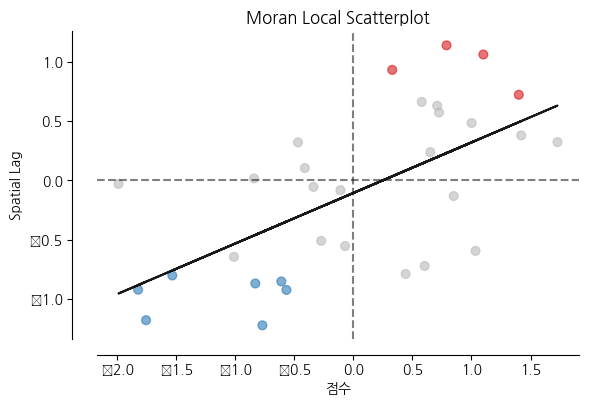

In [ ]:
# ÏßÄÏó≠ Í≥µÍ∞Ñ ÏûêÍ∏∞ÏÉÅÍ¥Ä
moran_local = Moran_Local(y, w)

fig, ax = plt.subplots(figsize=(8,4))
moran_scatterplot(Moran_Local(y, w), p=0.05, ax=ax)
ax.set_xlabel('Ï†êÏàò')
ax.set_ylabel('Spatial Lag')

plt.show()

In [ ]:
gdf.head()

geometry   Ïù¥Î¶Ñ       Ïù∏Ïûê1       Ïù∏Ïûê2  \
0  MULTIPOLYGON (((127.25464 36.7616, 127.25355 3...  Î™©Ï≤úÏùç -0.428516  0.244970   
1  MULTIPOLYGON (((127.13169 36.76247, 127.13145 ...  ÌíçÏÑ∏Î©¥  0.097299  0.496733   
2  MULTIPOLYGON (((127.12771 36.70858, 127.12766 ...  Í¥ëÎçïÎ©¥  1.616034 -0.269363   
3  MULTIPOLYGON (((127.30735 36.85967, 127.30704 ...   Î∂ÅÎ©¥  1.418237 -0.649956   
4  MULTIPOLYGON (((127.25464 36.7616, 127.25829 3...  ÏÑ±ÎÇ®Î©¥  2.063501 -0.356201   

        Ïù∏Ïûê3       Ïù∏Ïûê4       Ïù∏Ïûê5        Ï†êÏàò  Ï†êÏàò(0~100)  spatial_lag  
0  0.254566 -1.929201  0.116323 -0.164667  42.452270     0.012926  
1  0.108277  2.572931  0.598264  0.129501  65.404140    -0.296245  
2 -0.244159 -0.473698  0.314878  0.333659  81.333179    -0.228999  
3  0.104997 -0.502762  0.328843  0.201572  71.027351     0.059313  
4 -0.251009  0.870997  0.646503  0.467121  91.746345     0.108216

In [ ]:
gdf['moran_local']=moran_local.q
gdf.moran_local.value_counts()

moran_local
3    13
1    11
4     4
2     3
Name: count, dtype: int64

* 3: LL (Low-Low)	ÎåÄÏÉÅ ÏßÄÏ†êÏùò Í∞íÏù¥ ÎÇÆÍ≥†, Ï£ºÎ≥Ä Ïù¥ÏõÉÎì§ÎèÑ Í∞íÏù¥ ÎÇÆÏùå	Ï†ÄÍ∞íÏù¥ Î™®Ïó¨ ÏûàÎäî ‚ÄòÏΩúÎìúÏä§Ìåü‚Äô (Cold Spot)
* 1: HH (High-High)	ÎåÄÏÉÅ ÏßÄÏ†êÏùò Í∞íÏù¥ ÎÜíÍ≥†, Ï£ºÎ≥Ä Ïù¥ÏõÉÎì§ÎèÑ Í∞íÏù¥ ÎÜíÏùå	Í≥†Í∞íÏù¥ Î™®Ïó¨ ÏûàÎäî ‚ÄòÌï´Ïä§Ìåü‚Äô (Hot Spot)
* 2: LH (Low-High)	ÎåÄÏÉÅ ÏßÄÏ†êÏùò Í∞íÏùÄ ÎÇÆÏßÄÎßå, Ï£ºÎ≥Ä Ïù¥ÏõÉÎì§ÏùÄ Í∞íÏù¥ ÎÜíÏùå	Ï†ÄÍ∞íÏù¥ Ï£ºÎ≥Ä Í≥†Í∞íÎì§Í≥º Ïù∏Ï†ë, Í≥µÍ∞ÑÏ†Å Ïù¥ÏßàÏÑ± (Outlier)
* 4: HL (High-Low)	ÎåÄÏÉÅ ÏßÄÏ†êÏùò Í∞íÏùÄ ÎÜíÏßÄÎßå, Ï£ºÎ≥Ä Ïù¥ÏõÉÎì§ÏùÄ Í∞íÏù¥ ÎÇÆÏùå	Í≥†Í∞íÏù¥ Ï£ºÎ≥Ä Ï†ÄÍ∞íÎì§Í≥º Ïù∏Ï†ë, Í≥µÍ∞ÑÏ†Å Ïù¥ÏßàÏÑ± (Outlier)

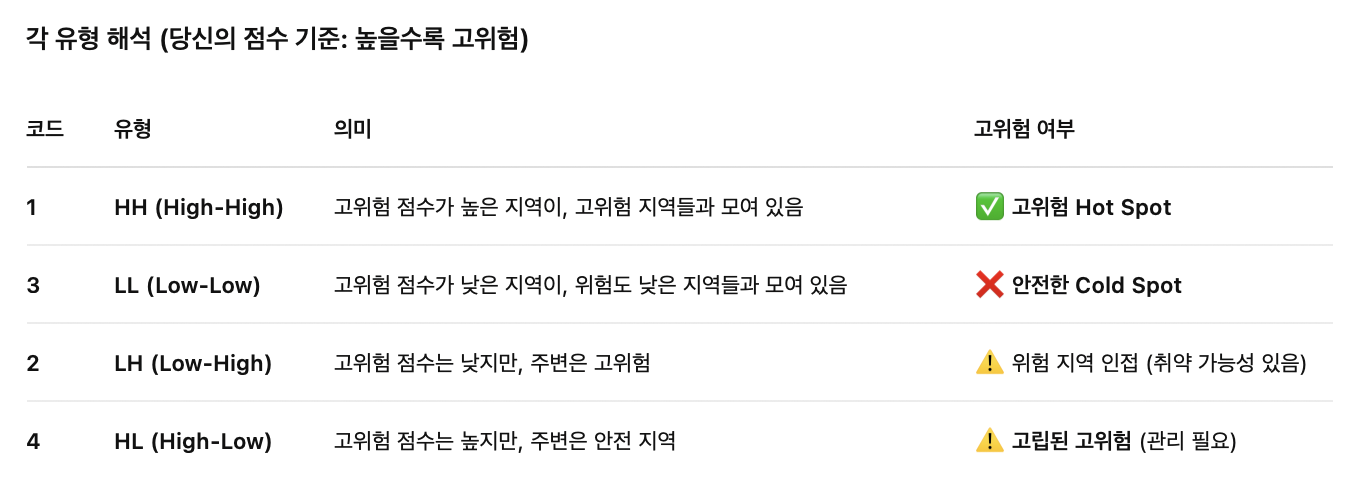

# Í≥µÍ∞Ñ ÏûêÍ∏∞ÏÉÅÍ¥ÄÏÑ±ÏùÑ Ïù¥Ïö©Ìïú ÏúÑÌóòÍµ∞ ÌïÑÌÑ∞ÎßÅ

In [ ]:
risk_df = gdf[gdf['moran_local'] == 1]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. moran_local == 1Ïù∏ Ìñâ ÌïÑÌÑ∞ÎßÅ
risk_df = gdf[gdf['moran_local'] == 1].copy()

# 2. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏóê ÏÇ¨Ïö©Ìï† Ïª¨ÎüºÎßå Ï∂îÏ∂ú
factor_cols = ['Ïù∏Ïûê1', 'Ïù∏Ïûê2', 'Ïù∏Ïûê3', 'Ïù∏Ïûê4', 'Ïù∏Ïûê5']
X = risk_df[factor_cols]

# 3. Ï†ïÍ∑úÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÌôî (Ïù∏Îç±Ïä§ ÎßûÏ∂§)
X_scaled_df = pd.DataFrame(X_scaled, columns=factor_cols, index=risk_df.index)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò Î≤îÏúÑ ÏÑ§Ï†ï
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

# 2. Elbow Plot ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [ ]:
# 5. KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=3, random_state=42)
risk_df['cluster'] = kmeans.fit_predict(X_scaled_df)

# 6. ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† ÌôïÏù∏
cluster_summary = risk_df.groupby('cluster')[factor_cols + ['Ï†êÏàò', 'Ï†êÏàò(0~100)']].mean()
cluster_summary

Ïù∏Ïûê1       Ïù∏Ïûê2       Ïù∏Ïûê3       Ïù∏Ïûê4       Ïù∏Ïûê5        Ï†êÏàò  Ï†êÏàò(0~100)
cluster                                                                       
0        1.755929 -0.489304 -0.029140 -0.825806  0.478377  0.279001  77.068600
1       -0.040368  1.115880 -0.766326  0.035378 -0.718829  0.268481  76.247792
2        1.521519  0.069033 -0.088691  0.553548  0.613753  0.391993  85.884624

In [ ]:
# 7. ÏúÑÌóòÎèÑ Îß§Ìïë (ÌïÑÏöîÏãú cluster_summary Î≥¥Í≥† ÏàòÏ†ï)
risk_mapping = {
    2: 'Í≥†ÏúÑÌóò',
    0: 'Ï§ëÏúÑÌóò',
    1: 'Ï†ÄÏúÑÌóò'
}
risk_df['ÏúÑÌóòÎèÑ'] = risk_df['cluster'].map(risk_mapping)

# 8. gdfÏóê ÏúÑÌóòÎèÑ Î∞è ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï†ïÎ≥¥ Î≥ëÌï© (moran_local==1Ïù∏ ÌñâÎßå ÏóÖÎç∞Ïù¥Ìä∏)
gdf.loc[risk_df.index, 'cluster'] = risk_df['cluster']
gdf.loc[risk_df.index, 'ÏúÑÌóòÎèÑ'] = risk_df['ÏúÑÌóòÎèÑ']

In [ ]:
gdf.head()

geometry   Ïù¥Î¶Ñ       Ïù∏Ïûê1       Ïù∏Ïûê2  \
0  MULTIPOLYGON (((127.25464 36.7616, 127.25355 3...  Î™©Ï≤úÏùç -0.428516  0.244970   
1  MULTIPOLYGON (((127.13169 36.76247, 127.13145 ...  ÌíçÏÑ∏Î©¥  0.097299  0.496733   
2  MULTIPOLYGON (((127.12771 36.70858, 127.12766 ...  Í¥ëÎçïÎ©¥  1.616034 -0.269363   
3  MULTIPOLYGON (((127.30735 36.85967, 127.30704 ...   Î∂ÅÎ©¥  1.418237 -0.649956   
4  MULTIPOLYGON (((127.25464 36.7616, 127.25829 3...  ÏÑ±ÎÇ®Î©¥  2.063501 -0.356201   

        Ïù∏Ïûê3       Ïù∏Ïûê4       Ïù∏Ïûê5        Ï†êÏàò  Ï†êÏàò(0~100)  spatial_lag  \
0  0.254566 -1.929201  0.116323 -0.164667  42.452270     0.012926   
1  0.108277  2.572931  0.598264  0.129501  65.404140    -0.296245   
2 -0.244159 -0.473698  0.314878  0.333659  81.333179    -0.228999   
3  0.104997 -0.502762  0.328843  0.201572  71.027351     0.059313   
4 -0.251009  0.870997  0.646503  0.467121  91.746345     0.108216   

   moran_local  cluster   ÏúÑÌóòÎèÑ  
0            2        0  None  
1            4        1  None  
2            4        2  None  
3            1        0   Ï§ëÏúÑÌóò  
4            1        2   Í≥†ÏúÑÌóò

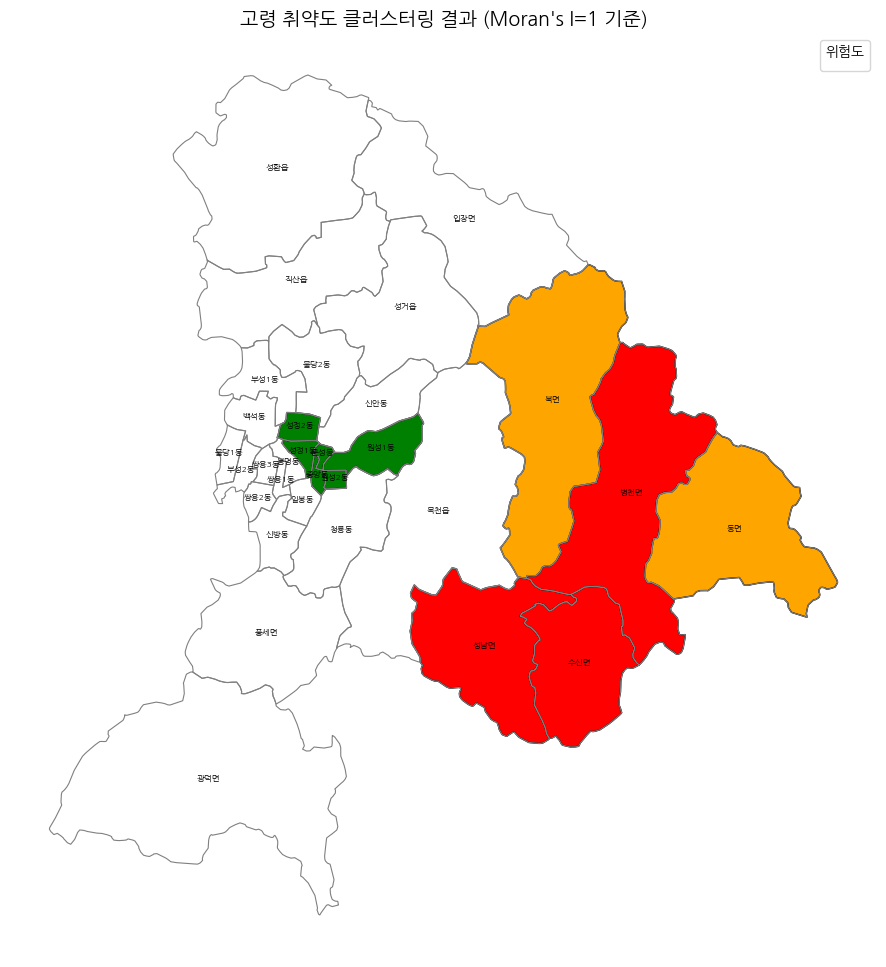

In [ ]:
# 9. ÏãúÍ∞ÅÌôî Ï§ÄÎπÑ
color_dict = {
    'Í≥†ÏúÑÌóò': 'red',
    'Ï§ëÏúÑÌóò': 'orange',
    'Ï†ÄÏúÑÌóò': 'green'
}

fig, ax = plt.subplots(figsize=(12, 12))

# Ï†ÑÏ≤¥ ÌñâÏ†ïÎèô ÌÖåÎëêÎ¶¨ ÌöåÏÉâÏúºÎ°ú Í∑∏Î¶º
gdf.boundary.plot(ax=ax, linewidth=0.8, edgecolor='gray')

# ÌñâÏ†ïÎèô Ïù¥Î¶Ñ ÌëúÏãú
for idx, row in gdf.iterrows():
    x = row.geometry.centroid.x
    y = row.geometry.centroid.y
    ax.text(x, y, row['Ïù¥Î¶Ñ'], fontsize=6, ha='center', color='black')

# moran_local == 1Ïù∏ ÏßÄÏó≠ Ï§ë ÏúÑÌóòÎèÑÎ≥Ñ ÏÉâÏπ†
for risk_level, color in color_dict.items():
    subset = gdf[(gdf['moran_local'] == 1) & (gdf['ÏúÑÌóòÎèÑ'] == risk_level)]
    subset.plot(ax=ax, color=color, edgecolor='black', linewidth=1, label=risk_level)

plt.legend(title="ÏúÑÌóòÎèÑ", loc='upper right')
plt.title("Í≥†Î†π Ï∑®ÏïΩÎèÑ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º (Moran's I=1 Í∏∞Ï§Ä)", fontsize=14)
plt.axis('off')
plt.show()

‚úÖ Ïôú Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÌÅ¨Í≤å ÎÇòÏßÄ ÏïäÎäî Í≤ÉÏù¥ Ïù¥ÏÉÅÌïòÏßÄ ÏïäÏùÄÍ∞Ä?

1.	ÏúÑÌóòÍµ∞ ÏûêÏ≤¥Í∞Ä ÎèôÏßàÏ†ÅÏù∏ ÏßëÎã®

	‚Ä¢	Ïï†Ï¥àÏóê Í∞ÄÏ§ëÏ†êÏàòÎÇò ÌäπÏ†ï Ïù∏Ïûê Í∏∞Ï§ÄÏúºÎ°ú ‚ÄúÏúÑÌóòÍµ∞‚ÄùÏùÑ ÌïÑÌÑ∞ÎßÅÌñàÍ∏∞ ÎïåÎ¨∏Ïóê, Ïù¥ Íµ∞Ïßë ÎÇ¥ÏóêÏÑúÎäî Ï†êÏàòÍ∞Ä ÏÉÅÌñ• ÌèâÏ§ÄÌôîÎêú ÏÉÅÌÉúÏûÖÎãàÎã§.

	‚Ä¢	Îî∞ÎùºÏÑú Ïù¥ ÏïàÏóêÏÑú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùÑ Ìï¥ÎèÑ Ï†êÏàò Ï∞®Ïù¥Îäî ÌÅ¨ÏßÄ ÏïäÏßÄÎßå, Íµ¨Ï°∞ÎÇò Ìå®ÌÑ¥ÏùÄ Îã§Î•º Ïàò ÏûàÏäµÎãàÎã§.

2.	Íµ∞ÏßëÌôî Î™©Ï†ÅÏù¥ ‚ÄòÍµ¨Î∂Ñ‚ÄôÏù¥ ÏïÑÎãàÎùº ‚ÄòÏÑ∏Î∂ÑÌôî‚Äô

	‚Ä¢	ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùò Î™©Ï†ÅÏù¥ Í≥†ÏúÑÌóòÍµ∞ ÎÇ¥Ïùò ÏÑ∏Î∂Ä Ïú†ÌòïÏùÑ ÌååÏïÖÌïòÎäî Í≤ÉÏù¥Í∏∞ ÎïåÎ¨∏Ïóê, Ï†êÏàòÎ≥¥Îã§Îäî Ïñ¥Îñ§ Ïù∏ÏûêÍ∞Ä ÎëêÎìúÎü¨ÏßÄÍ≤å ÏûëÏö©ÌïòÎäîÏßÄÍ∞Ä Îçî Ï§ëÏöîÌï©ÎãàÎã§.

	‚Ä¢	Ïòà: Ïñ¥Îñ§ Íµ∞ÏßëÏùÄ Ïù∏Ïûê1(Ïù∏ÌîÑÎùº Î∂ÄÏ°±), Ïñ¥Îñ§ Íµ∞ÏßëÏùÄ Ïù∏Ïûê2(ÏùòÎ£å Ï†ëÍ∑ºÏÑ± ÎÇÆÏùå) Îì±.

3.	Ï†êÏàò Ï∞®Ïù¥Î≥¥Îã§ ‚ÄòÏù∏Ïûê Ï°∞Ìï© Ï∞®Ïù¥‚ÄôÍ∞Ä Ìè¨Ïù∏Ìä∏

	‚Ä¢	Ï†êÏàò ÌèâÍ∑†Ïù¥ ÎπÑÏä∑ÌïòÎçîÎùºÎèÑ, Í∞Å Íµ∞ÏßëÎ≥ÑÎ°ú Ïñ¥Îñ§ Ïù∏ÏûêÏóê ÏùòÌï¥ Ï†êÏàòÍ∞Ä Íµ¨ÏÑ±ÎêòÏóàÎäîÏßÄÍ∞Ä Îã§Î•¥Îã§Î©¥ Ï†ïÏ±ÖÏ†Å Ï†ëÍ∑ºÏù¥ Îã¨ÎùºÏßëÎãàÎã§.

	‚Ä¢	Ïòà: AÏôÄ B Îëò Îã§ 76Ï†êÏù¥ÏßÄÎßå, AÎäî ‚ÄòÏù∏ÏßÄÍ±¥Í∞ï‚ÄôÏù¥ ÏïΩÌïòÍ≥† BÎäî ‚ÄòÏÉùÌôú Ïù∏ÌîÑÎùº‚ÄôÍ∞Ä ÏïΩÌïú ÏãùÏúºÎ°ú.

‚∏ª

üîç Í∑∏ÎûòÏÑú Ïñ¥ÎñªÍ≤å Ìï¥ÏÑùÌï¥Ïïº ÌïòÎÇòÏöî?

‚Ä¢	ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Ïù∏ÏûêÍ∞íÏùÑ Î≥¥Í≥† Ìï¥ÏÑù

‚Üí Ïñ¥Îñ§ Ïù∏ÏûêÍ∞Ä ÎëêÎìúÎü¨ÏßÄÎäîÏßÄ ÌååÏïÖÌï¥ÏÑú Ïú†ÌòïÌôî (Ïòà: ‚ÄúÏù∏ÏßÄ Ï∑®ÏïΩÌòï‚Äù, ‚ÄúÏÉùÌôú Ï∑®ÏïΩÌòï‚Äù Îì±)

‚Ä¢	ÏãúÍ∞ÅÌôî ÌôúÏö©

‚Üí Î†àÏù¥Îçî Ï∞®Ìä∏, Î∞î Ï∞®Ìä∏ Îì±ÏúºÎ°ú Í∞Å Íµ∞ÏßëÏùò Ïù∏Ïûê Ìå®ÌÑ¥ÏùÑ ÏãúÍ∞ÅÌôîÌïòÎ©¥ Îçî ÎöúÎ†∑ÌïòÍ≤å Î≥¥ÏûÖÎãàÎã§.

‚∏ª

üìù Í≤∞Î°†

Í≥†ÏúÑÌóòÍµ∞ ÎÇ¥ ÏÑ∏Î∂ÑÌôîÎ•º ÏúÑÌïú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏóêÏÑúÎäî Ï†êÏàò Ï∞®Ïù¥Í∞Ä ÌÅ¨Í≤å ÎÇòÏßÄ ÏïäÎäî Í≤å Ïò§ÌûàÎ†§ ÌÉÄÎãπÌï©ÎãàÎã§.
Ïù¥Ï†úÎäî ‚ÄòÏôú ÎπÑÏä∑Ìïú Ï†êÏàò ÏïàÏóêÏÑúÎèÑ Îã§Î•¥Í≤å Íµ∞ÏßëÌôîÎêòÏóàÎäîÏßÄ‚ÄôÎ•º ÏÑ§Î™ÖÌïòÎäî ÏûëÏóÖÏù¥ ÌïÑÏöîÌï©ÎãàÎã§.

In [ ]:
# Í≥†ÏúÑÌóò ÏÇ¨Í∞ÅÏßÄÎåÄ
gdf[gdf['cluster']==2]['Ïù¥Î¶Ñ']

2      Í¥ëÎçïÎ©¥
4      ÏÑ±ÎÇ®Î©¥
5      ÏàòÏã†Î©¥
6      Î≥ëÏ≤úÎ©¥
17     ÏÑ±ÌôòÏùç
20     ÏûÖÏû•Î©¥
25    ÏåçÏö©3Îèô
Name: Ïù¥Î¶Ñ, dtype: object

In [ ]:
# Ï§ëÏúÑÌóò ÏÇ¨Í∞ÅÏßÄÎåÄ
gdf[gdf['cluster']==0]['Ïù¥Î¶Ñ']

0      Î™©Ï≤úÏùç
3       Î∂ÅÎ©¥
7       ÎèôÎ©¥
12     Î¥âÎ™ÖÎèô
14     Ïã†Î∞©Îèô
18     ÏÑ±Í±∞Ïùç
19     ÏßÅÏÇ∞Ïùç
23    ÏåçÏö©1Îèô
Name: Ïù¥Î¶Ñ, dtype: object

In [ ]:
# Ï†ÄÏúÑÌóò ÏÇ¨Í∞ÅÏßÄÎåÄ
gdf[gdf['cluster']==1]['Ïù¥Î¶Ñ']

1      ÌíçÏÑ∏Î©¥
8      Ï§ëÏïôÎèô
9      Î¨∏ÏÑ±Îèô
10    ÏõêÏÑ±1Îèô
11    ÏõêÏÑ±2Îèô
13     ÏùºÎ¥âÎèô
15     Ï≤≠Î£°Îèô
16     Ïã†ÏïàÎèô
21    ÏÑ±Ï†ï1Îèô
22    ÏÑ±Ï†ï2Îèô
24    ÏåçÏö©2Îèô
26     Î∞±ÏÑùÎèô
27    Î∂àÎãπ1Îèô
28    Î∂àÎãπ2Îèô
29    Î∂ÄÏÑ±1Îèô
30    Î∂ÄÏÑ±2Îèô
Name: Ïù¥Î¶Ñ, dtype: object

clusterÏóêÎäî ÏúÑÌóòÍµ∞Ïù¥ ÏïÑÎãå ÌñâÏ†ïÎèôÎèÑ Ìè¨Ìï®!

clusterÏóê ÏûàÎäî ÌñâÏ†ïÎèôÍ∞ÑÏùò ÌäπÏÑ± ÌååÏïÖÏùÑ ÌïòÍ≥†

-> cluster Ï§ë ÏúÑÌóòÍµ∞Ïóê ÏÜçÌïòÎäî('moran_local' == 1 [HH]) Í≥≥Ïùò ÌäπÏÑ±Í≥º ÏúÑÌóòÍµ∞Ïù∏ Ïù¥Ïú† Ïú†Ï∂î..?

# Ïù¥Í±¥ Í∑∏ÎÉ• ÏßÄÌîºÌã∞ÌïúÌÖå Î∂ÄÌÉÅÌïú ÌÅ¥Îü¨Ïä§ÌÑ∞ Ìï¥ÏÑù

Ï£ºÏñ¥ÏßÑ Ï†ïÎ≥¥Î•º Î∞îÌÉïÏúºÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ 0, 1, 2Ïùò ÌäπÏÑ±ÏùÑ Ìï¥ÏÑùÌïòÎ©¥ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§:

‚∏ª

‚úÖ Ïù∏ÏûêÎ≥Ñ ÏùòÎØ∏ Ï†ïÎ¶¨

‚Ä¢	Ïù∏Ïûê 1: Í≥†Î†πÌôî Î∞è ÎèÖÍ±∞ÎÖ∏Ïù∏ ÌäπÏÑ±

‚Ä¢	Ïù∏Ïûê 2: Í≤ΩÏ†úÌôúÎèô Î∞è ÏÜåÎπÑÏó¨Î†•

‚Ä¢	Ïù∏Ïûê 3: Ïù∏ÏßÄÍ±¥Í∞ï ÏÑúÎπÑÏä§ ÏßÄÏõê

‚Ä¢	Ïù∏Ïûê 4: Í∏àÏúµÏ∑®ÏïΩÎèÑ Î∞è Î∂ÄÏ±ÑÎ∂ÄÎã¥

‚Ä¢	Ïù∏Ïûê 5: Ï∑®ÏïΩ ÎÖ∏Ïù∏ ÏÉùÌôú Ïù∏ÌîÑÎùº

‚∏ª

üìä ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑†Í∞í ÏöîÏïΩ

Cluster|Ïù∏Ïûê1|Ïù∏Ïûê2|Ïù∏Ïûê3|Ïù∏Ïûê4|Ïù∏Ïûê5|Ï†êÏàò(0~100)
-|-|-|-|-|-|-
0|1.76|-0.49|-0.03|-0.83|0.48|77.07
1|-0.04|1.12|-0.77|0.04|-0.72|76.25
2|1.52|0.07|-0.09|0.55|0.61|85.88


‚∏ª

üîç ÌÅ¥Îü¨Ïä§ÌÑ∞ Ìï¥ÏÑù

üìå ÌÅ¥Îü¨Ïä§ÌÑ∞ 2 (Ï†êÏàò 85.88) ‚Üí Í≥†ÏúÑÌóòÍµ∞

‚Ä¢	Ïù∏Ïûê1(Í≥†Î†πÌôî Î∞è ÎèÖÍ±∞ÎÖ∏Ïù∏): Îß§Ïö∞ ÎÜíÏùå ‚Üí Í≥†Î†π Î∞è ÎèÖÍ±∞ ÎπÑÏú® ÎÜíÏùå

‚Ä¢	Ïù∏Ïûê4(Í∏àÏúµÏ∑®ÏïΩÎèÑ): Îß§Ïö∞ ÎÜíÏùå ‚Üí ÎåÄÏ∂úÏûîÏï° ÌÅ¨Í≥† Í∏àÏúµ Ï∑®ÏïΩ

‚Ä¢	Ïù∏Ïûê5(ÏÉùÌôú Ïù∏ÌîÑÎùº Î∂ÄÏ°±): ÎÜíÏùå ‚Üí Ïû¨Í∞ÄÎ≥µÏßÄ, Í∏âÏãùÏÜå, ÏùºÏûêÎ¶¨ Îì± Î∂ÄÏ°±

‚Üí Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÏÇ¨ÌöåÏ†Å¬∑Í≤ΩÏ†úÏ†ÅÏúºÎ°ú Îß§Ïö∞ Ï∑®ÏïΩÌïú ÎÖ∏Ïù∏ ÏßëÎã®

üìå ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 (Ï†êÏàò 77.07) ‚Üí Ï§ëÏúÑÌóòÍµ∞

‚Ä¢	Ïù∏Ïûê1: Îß§Ïö∞ ÎÜíÏùå ‚Üí Í≥†Î†π¬∑ÎèÖÍ±∞ÎÖ∏Ïù∏ ÎπÑÏ§ë ÎÜíÏùå

‚Ä¢	Ïù∏Ïûê4: ÎÇÆÏùå ‚Üí ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Í∏àÏúµÏ†Å Î∂ÄÎã¥ Ï†ÅÏùå

‚Ä¢	Ïù∏Ïûê5: Îã§ÏÜå ÎÜíÏùå ‚Üí ÏÉùÌôú Ïù∏ÌîÑÎùº ÏùºÎ∂Ä Î∂ÄÏ°±

‚Ä¢	Ïù∏Ïûê2: ÎÇÆÏùå ‚Üí ÏÜåÎπÑ¬∑ÏÜåÎìù Ïó¨Î†• Î∂ÄÏ°±

‚Üí ÎÖ∏Ïù∏ ÎπÑÏ§ëÏùÄ ÎÜíÏúºÎÇò, Í∏àÏúµ¬∑Í±¥Í∞ï Î¶¨Ïä§ÌÅ¨Îäî ÏïΩÍ∞Ñ ÎçúÌïú Ï§ëÏúÑÌóòÍµ∞

üìå ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 (Ï†êÏàò 76.25) ‚Üí Ï†ÄÏúÑÌóòÍµ∞ ÎòêÎäî Ïû†Ïû¨ ÏúÑÌóòÍµ∞

‚Ä¢	Ïù∏Ïûê2: Îß§Ïö∞ ÎÜíÏùå ‚Üí ÏÜåÎìù, ÏÜåÎπÑ Ïó¨Î†• ÎÜíÏùå

‚Ä¢	Ïù∏Ïûê3: Îß§Ïö∞ ÎÇÆÏùå ‚Üí Ïù∏ÏßÄÍ±¥Í∞ï Í¥ÄÎ†® Ïù∏ÌîÑÎùº Î∂ÄÏ°±

‚Ä¢	Ïù∏Ïûê5: ÎÇÆÏùå ‚Üí ÏÉùÌôú Ïù∏ÌîÑÎùº Î∂ÄÏ°±

‚Ä¢	Ïù∏Ïûê1: Í±∞Ïùò ÌèâÍ∑† ‚Üí Í≥†Î†πÌôîÎäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ï†ÅÎãπ

‚Üí Í≤ΩÏ†úÏ†Å Ïó¨Î†•ÏùÄ ÏûàÏúºÎÇò Ïù∏ÏßÄÍ±¥Í∞ï¬∑Î≥µÏßÄÏãúÏÑ§ Î∂ÄÏ°±ÏúºÎ°ú ÏúÑÌóò Í∞ÄÎä•ÏÑ± Ï°¥Ïû¨

‚∏ª

image.png


‚∏ª

üí° Ï†úÏïà

‚Ä¢	ÌÅ¥Îü¨Ïä§ÌÑ∞ 1ÏùÄ ‚ÄúÏ†ÄÏúÑÌóò‚ÄùÏù¥ÎùºÍ∏∞Î≥¥Îã§Îäî **‚ÄúÎπÑÏû¨Ï†ïÏ†Å ÏúÑÌóò(Ïù∏ÏßÄÍ±¥Í∞ï/ÏÑúÎπÑÏä§ Î∂ÄÏ°±)‚Äù**Ïù¥ Ïª§ÏÑú Ïû†Ïû¨ ÏúÑÌóòÍµ∞ÏúºÎ°ú Î∂ÑÎ•òÌïòÎäî Í≤ÉÏù¥ ÌÉÄÎãπÌï¥ Î≥¥ÏûÖÎãàÎã§.

‚Ä¢	Ï†êÏàò Ï∞®Ïù¥Îäî ÏûëÎçîÎùºÎèÑ Ïù∏Ïûê ÌîÑÎ°úÌååÏùºÏùò Î∞©Ìñ•ÏÑ±Ïù¥ Îã§Î•¥Í∏∞ ÎïåÎ¨∏Ïóê, Îã®Ïàú ÌèâÍ∑† Ï†êÏàòÎ≥¥Îã§ ÏöîÏù∏Î≥Ñ ÌäπÏÑ±Í≥º Ï°∞Ìï©Ïóê Îî∞Îùº Ìï¥ÏÑùÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌï©ÎãàÎã§.